# Challenge 4

Topic: Linear Regression and Learning Curve<br>
Date: 10/11/2016 <br>
Name: Travis James <br>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf
import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

%matplotlib inline

**Challenge 4.1**

In [20]:
x = np.random.uniform(1, 100, 1000)
y = 5 + 8*np.log(x) + np.random.uniform(1, 20, 1000)

In [21]:
df = pd.DataFrame({'y':y,'x':x})

In [22]:
df['x2'] = np.square(df['x'])
df['xlog'] = np.log(df['x'])

In [23]:
X1 = df[['x', 'x2']]
X2 = df[['x', 'xlog']]

In [24]:
model1 = smf.OLS(y, X1)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     9157.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        14:17:17   Log-Likelihood:                -3762.5
No. Observations:                1000   AIC:                             7529.
Df Residuals:                     998   BIC:                             7539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              1.6780      0.023     73.428      0.000         1.633     1.723
x2            -0.0128      0.000    -42.653      0.000        -0.013    -0.012
==============================================================================
Omnibus:                       43.608   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.748
Skew:                           0.383   Prob(JB):                     1.73e-08
Kurtosis:                       2.480   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2 = smf.OLS(y, X2)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.756e+04
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        14:17:19   Log-Likelihood:                -3229.1
No. Observations:                1000   AIC:                             6462.
Df Residuals:                     998   BIC:                             6472.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x             -0.1572      0.011    -14.241      0.000        -0.179    -0.136
xlog          14.3397      0.169     84.788      0.000        14.008    14.672
==============================================================================
Omnibus:                       22.134   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.832
Skew:                           0.197   Prob(JB):                     0.000365
Kurtosis:                       2.527   Cond. No.                         50.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Challenge 4.2**

In [28]:
y2 = 5 + 8*x + 15*np.square(x) + np.random.uniform(1, 20, 1000)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size=0.25)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
mean_squared_error(y_train, y_train_pred)

30.545824873840495

In [38]:
y_test_pred = lr.predict(X_test)
mean_squared_error(y_test, y_test_pred)

30.229117017656208

**Challenge 4.3**

In [57]:
train_error = []
test_error = []
r2 = []
lr = LinearRegression()

for i in range (0, 8):
    X = np.power(x, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.25)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_pred))
    
    r2.append(lr.score(X_test, y_test))

In [66]:
polynomial = list(range(0,8))

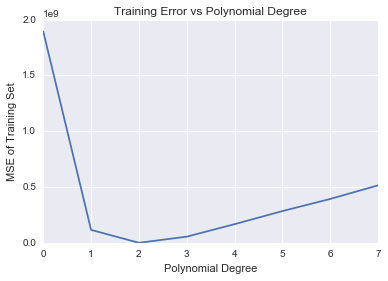

In [75]:
plt.plot(polynomial, train_error)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE of Training Set')
plt.title('Training Error vs Polynomial Degree');

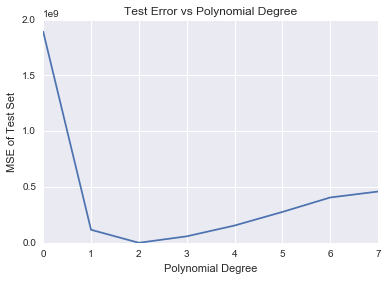

In [76]:
plt.plot(polynomial, test_error)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE of Test Set')
plt.title('Test Error vs Polynomial Degree');

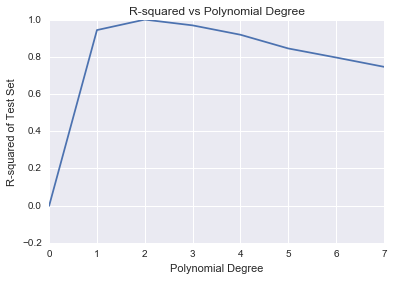

In [77]:
plt.plot(polynomial, r2)
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared of Test Set')
plt.title('R-squared vs Polynomial Degree');

**Challenge 4.4**

In [85]:
m = list(range(5, 755, 5))

In [87]:
train_error = []
test_error = []
X = np.square(x)

for number in m:
    X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size= 0.25)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    X_train = X_train[:number,:]
    y_train = y_train[:number]
    
    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_pred))

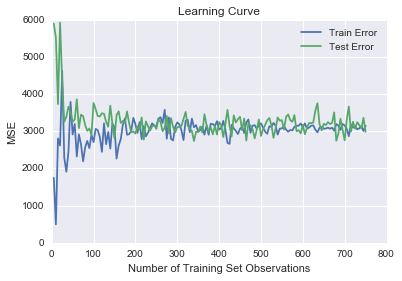

In [99]:
plt.plot(m, train_error)
plt.plot(m, test_error)
plt.legend(['Train Error', 'Test Error'])
plt.xlabel('Number of Training Set Observations')
plt.ylabel('MSE')
plt.title('Learning Curve');